In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [4]:
df = pd.read_csv("fraud_feature_engineering_example.csv")
print(df.head())

  trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...  \
0                561 Perry Cove  Moravian Falls  ...   
1  43039 Riley Greens Suite 393          Orient  ...   
2      594 Whi

In [5]:
df.shape

(1852394, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   trans_date_trans_time         object 
 1   cc_num                        int64  
 2   merchant                      object 
 3   category                      object 
 4   amt                           float64
 5   first                         object 
 6   last                          object 
 7   gender                        object 
 8   street                        object 
 9   city                          object 
 10  state                         object 
 11  zip                           int64  
 12  lat                           float64
 13  long                          float64
 14  city_pop                      int64  
 15  job                           object 
 16  dob                           object 
 17  trans_num                     object 
 18  unix_time             

In [7]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,4.153689e+03,4.530560e+04,3.762028e+02,4.567241e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,3.909005e+03,3.586752e+04,7.253531e+02,4.575502e+00
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,1.000000e+00,1.020000e+00,0.000000e+00,0.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,1.344790e+03,1.734142e+04,9.020000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,3.071990e+03,3.743910e+04,7.589000e+01,3.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,5.738470e+03,6.472088e+04,4.259800e+02,7.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,4.326189e+04,2.190868e+05,1.204718e+04,4.800000e+01


In [8]:
df.columns.tolist()

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'amt_month',
 'amt_year',
 'amt_month_shopping_net_spend',
 'count_month_shopping_net',
 'first_time_at_merchant']

In [9]:
df.isnull().sum()

trans_date_trans_time           0
cc_num                          0
merchant                        0
category                        0
amt                             0
first                           0
last                            0
gender                          0
street                          0
city                            0
state                           0
zip                             0
lat                             0
long                            0
city_pop                        0
job                             0
dob                             0
trans_num                       0
unix_time                       0
merch_lat                       0
merch_long                      0
is_fraud                        0
amt_month                       0
amt_year                        0
amt_month_shopping_net_spend    0
count_month_shopping_net        0
first_time_at_merchant          0
dtype: int64

In [10]:
df.nunique()

trans_date_trans_time           1819551
cc_num                              999
merchant                            693
category                             14
amt                               60616
first                               355
last                                486
gender                                2
street                              999
city                                906
state                                51
zip                                 985
lat                                 983
long                                983
city_pop                            891
job                                 497
dob                                 984
trans_num                       1852394
unix_time                       1819583
merch_lat                       1754157
merch_long                      1809753
is_fraud                              2
amt_month                        896534
amt_year                        1694572
amt_month_shopping_net_spend      73861


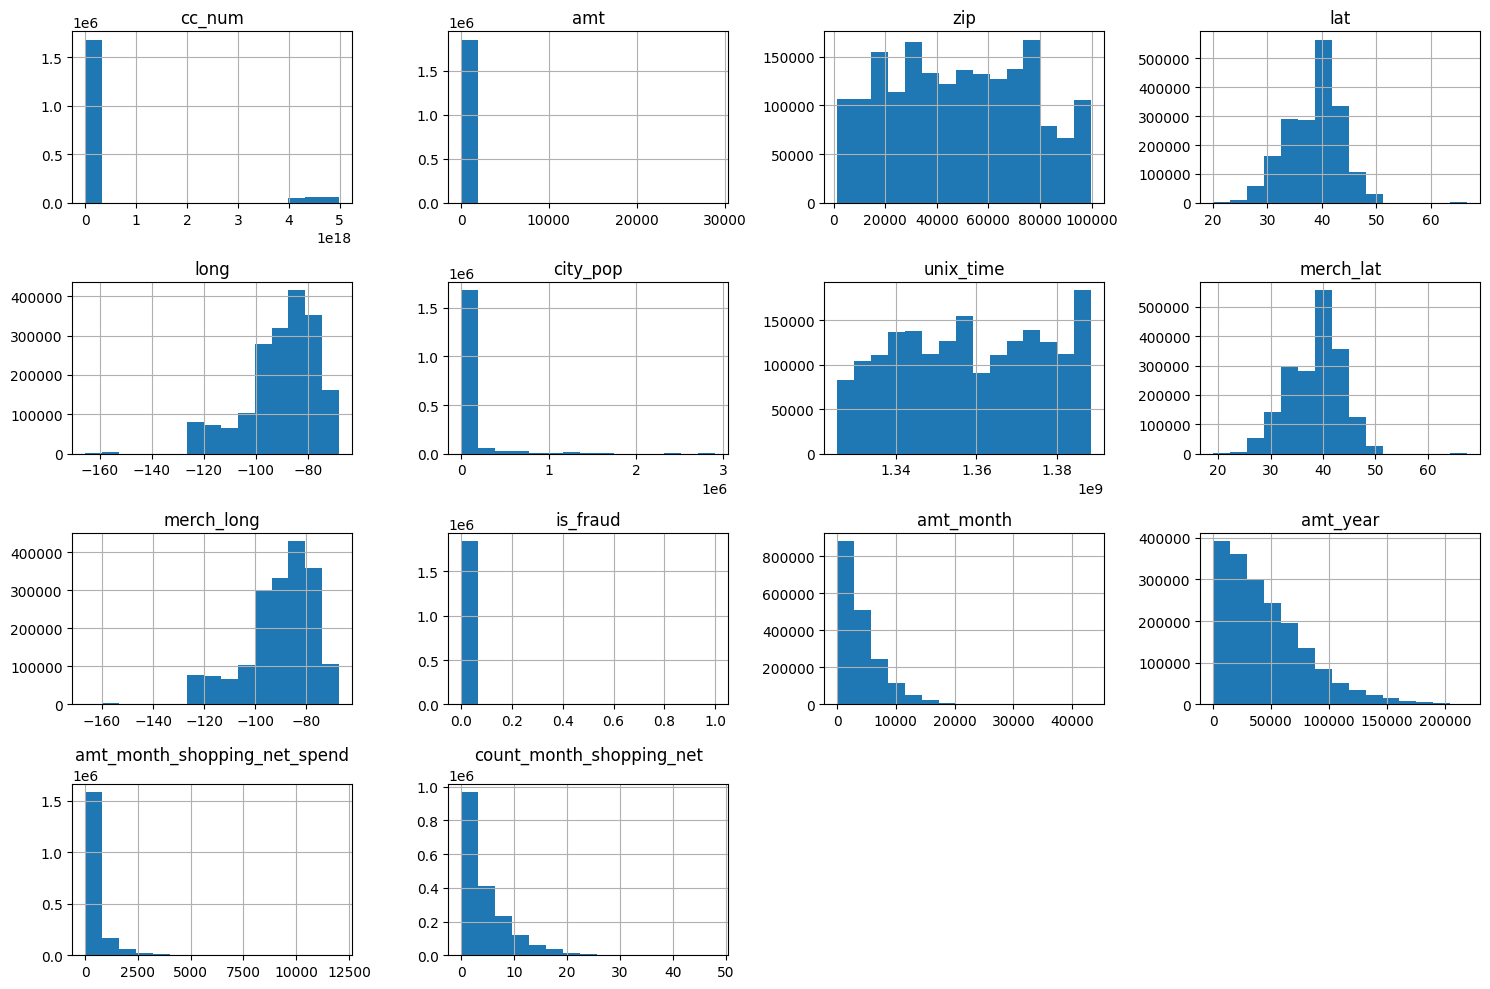

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

Vamos a realizar un gráfico de densidad de kernel, debido a que queremos ver la forma general de la distribución de los datos.

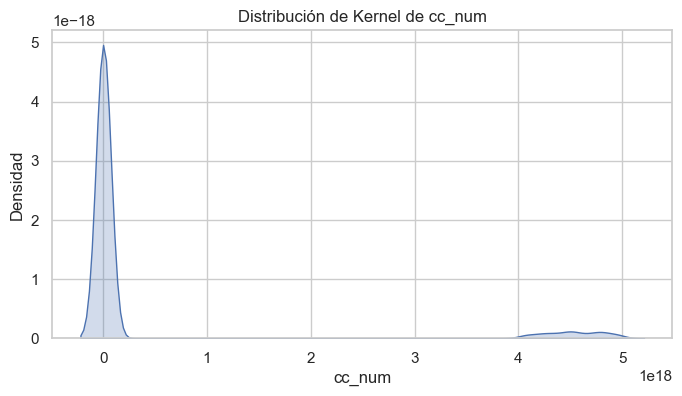

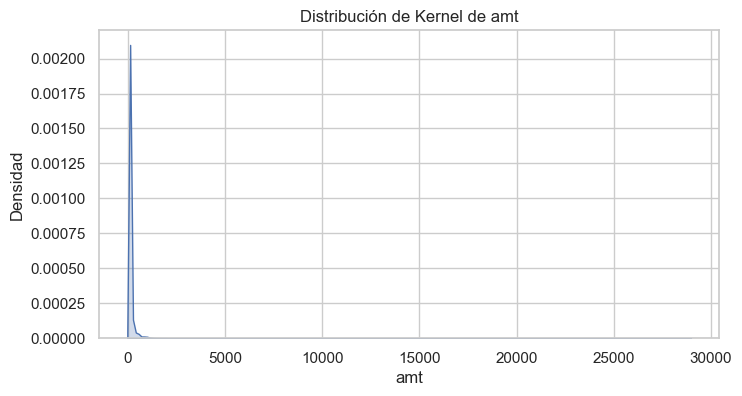

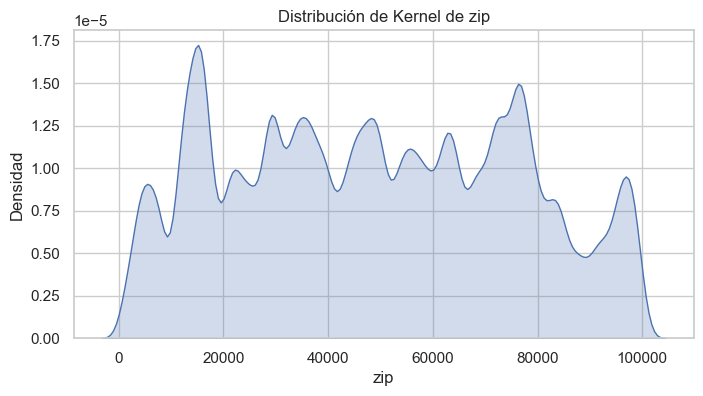

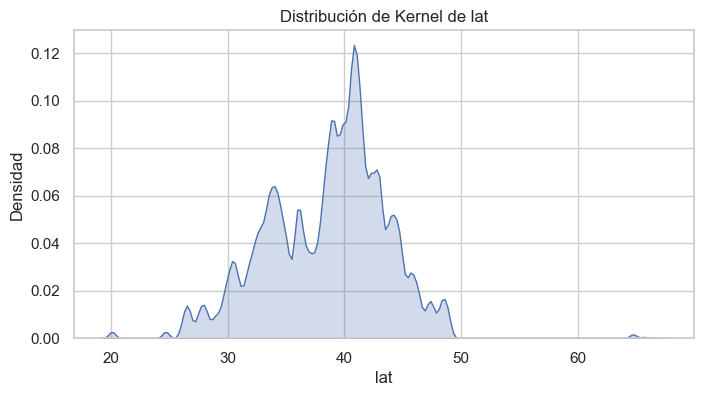

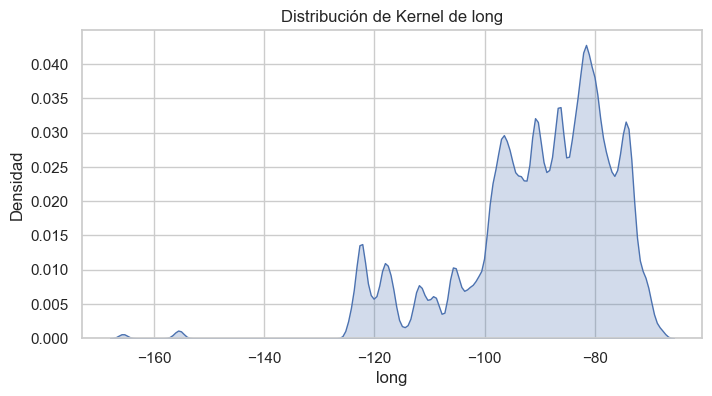

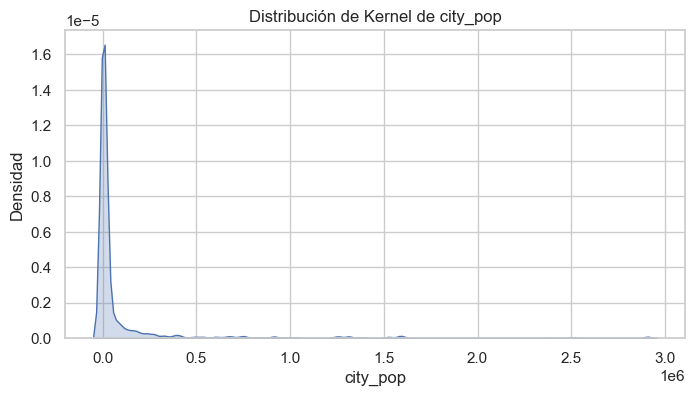

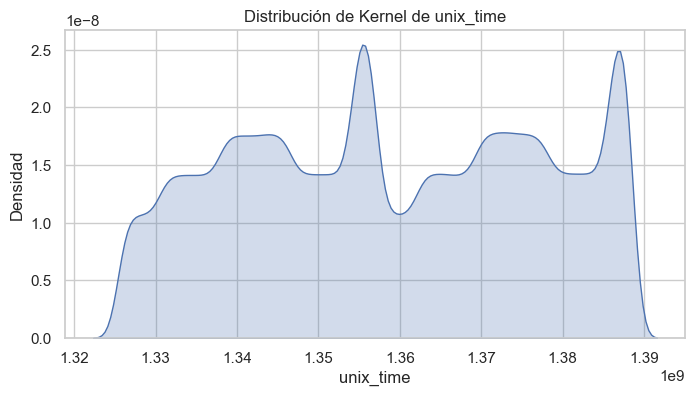

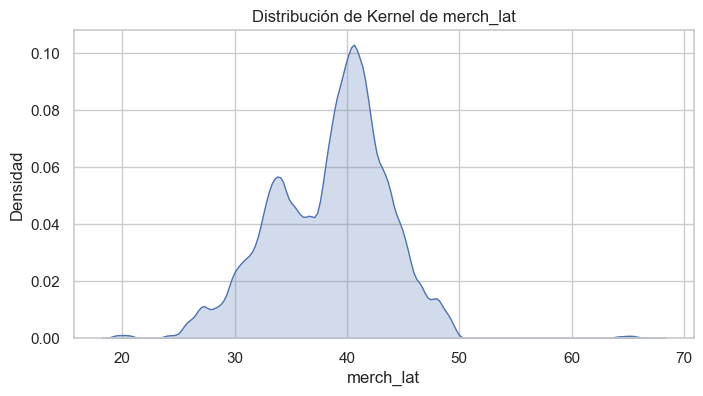

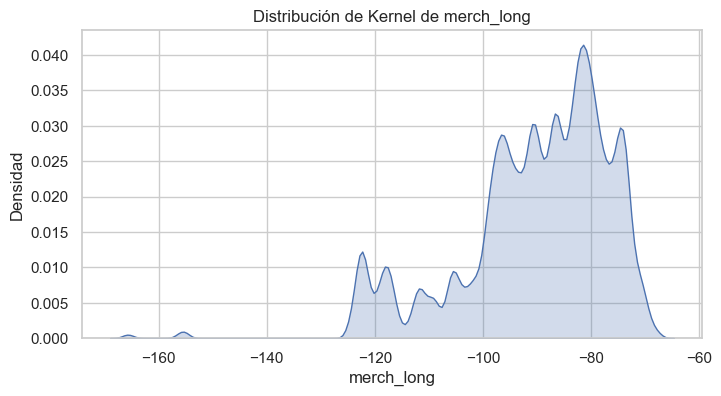

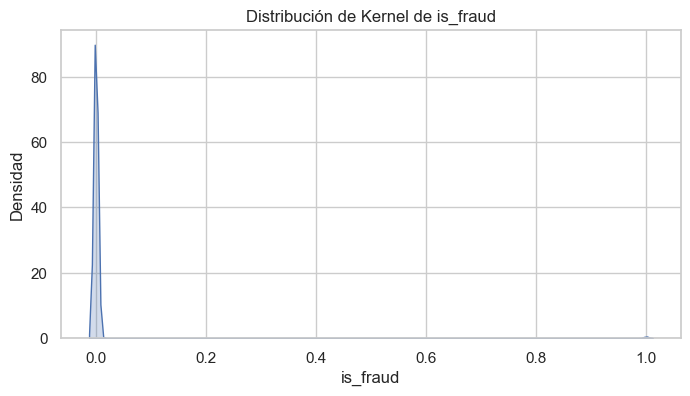

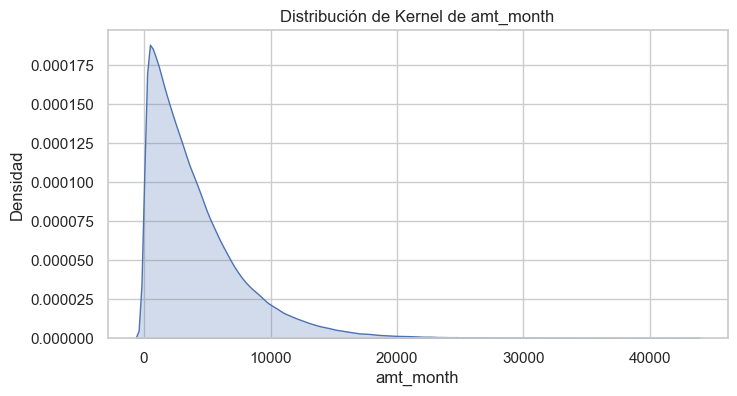

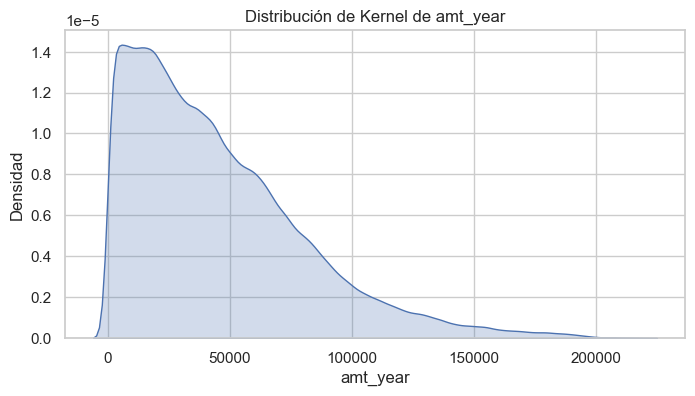

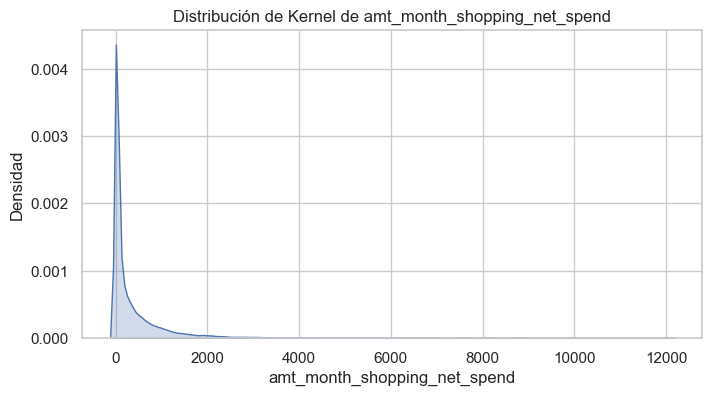

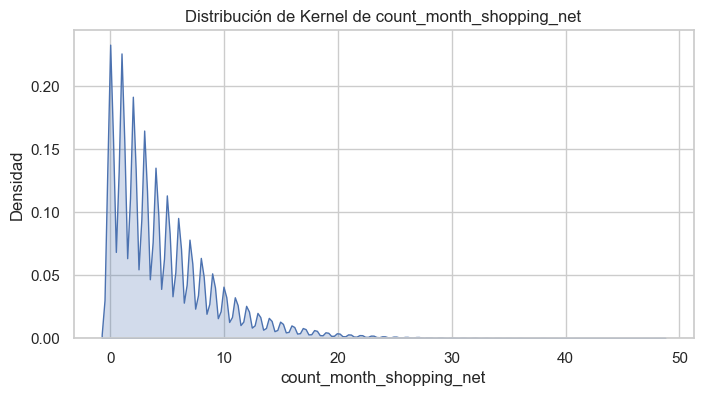

In [12]:
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Configuramos el estilo de los gráficos
sns.set(style='whitegrid')

# Creamos un gráfico de densidad para cada variable numérica
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], fill=True)  # 'fill=True' rellena el área bajo la curva
    plt.title(f'Distribución de Kernel de {col}')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.show()